### Task 1 
Regression model for  Situation Awareness, using two methods XgBoost and  LightGBM - Distributed and Non-distributed.


Develop Gradient Boosting for Situation Awareness Prediction (40/40)

### Task 1.1 Importing and preprocessing data 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('SAdata_allMeasures.csv') 
print(data.head()) 


   age  gender  yearDriving  drivingFrequency  temp_length  temp_decisiontime  \
0   26       1           20                 1           12            4.80219   
1   26       1           20                 1            6            4.91667   
2   26       1           20                 1            1            2.21716   
3   26       1           20                 1            3            2.63056   
4   26       1           20                 1            9            2.42632   

   temp_decision_made  temp_correct_decision  temp_danger  temp_difficulty  \
0                   4                      2           20               89   
1                   1                      2           10               99   
2                   2                      2           99               99   
3                   1                      2            9               79   
4                   1                      2            9               96   

   ...    fMax  backMirror  leftMirror  righ

In [2]:
print(data.isnull().sum())


age                      0
gender                   0
yearDriving              0
drivingFrequency         0
temp_length              0
temp_decisiontime        0
temp_decision_made       0
temp_correct_decision    0
temp_danger              0
temp_difficulty          0
CarPlacedLeft            0
CarPlacedRight           0
numS                     0
sAmpMean                 0
sAmpStd                  0
sAmpMax                  0
numF                     0
fMean                    0
fStd                     0
fMax                     0
backMirror               0
leftMirror               0
rightMirror              0
road                     0
sky                      0
pupilChange              0
pupilMean                0
pupilStd                 0
Y                        0
dtype: int64


In [3]:
data.describe()

age       gender  yearDriving  drivingFrequency  temp_length  \
count  1054.000000  1054.000000  1054.000000       1054.000000  1054.000000   
mean     24.222960     1.093928    18.751423          2.563567     6.328273   
std       1.815467     0.291867     1.370865          1.521371     4.919332   
min      22.000000     1.000000    16.000000          0.000000     1.000000   
25%      23.000000     1.000000    18.000000          1.250000     3.000000   
50%      24.000000     1.000000    18.000000          3.000000     6.000000   
75%      25.750000     1.000000    19.000000          4.000000     9.000000   
max      29.000000     2.000000    22.000000          5.000000    20.000000   

       temp_decisiontime  temp_decision_made  temp_correct_decision  \
count        1054.000000         1054.000000            1054.000000   
mean            2.098773            2.129981               4.552182   
std             0.900854            1.159294               6.932357   
min             0.491460            1.000000               1.000000   
25%             1.443955            1.000000               1.000000   
50%             1.967930            2.000000               2.000000   
75%             2.550390            3.000000               3.000000   
max             4.988970            4.000000              23.000000   

       temp_danger  temp_difficulty  ...          fMax   backMirror  \
count  1054.000000      1054.000000  ...   1054.000000  1054.000000   
mean     50.859583        63.760911  ...   1361.310247     3.363378   
std      30.127699        20.962721  ...   1389.702357     3.951970   
min       0.000000         0.000000  ...    125.000000     0.000000   
25%      24.000000        50.000000  ...    626.500000     0.000000   
50%      54.000000        68.000000  ...   1027.250000     2.000000   
75%      78.750000        79.000000  ...   1640.500000     5.000000   
max     100.000000       100.000000  ...  20032.000000    24.000000   

        leftMirror  rightMirror         road          sky  pupilChange  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.652751     0.545541     7.501898     0.277989     0.668057   
std       1.206546     1.073427     5.697961     0.634217     0.340351   
min       0.000000     0.000000     0.000000     0.000000    -0.388584   
25%       0.000000     0.000000     3.000000     0.000000     0.403116   
50%       0.000000     0.000000     6.000000     0.000000     0.648153   
75%       1.000000     1.000000    10.000000     0.000000     0.901552   
max       8.000000     7.000000    34.000000     7.000000     1.895700   

         pupilMean     pupilStd            Y  
count  1054.000000  1054.000000  1054.000000  
mean      3.682409     0.207402     0.284565  
std       0.584856     0.084595     0.135465  
min       2.077403     0.000625     0.022720  
25%       3.284157     0.140436     0.179778  
50%       3.640111     0.203310     0.269335  
75%       4.107624     0.264821     0.377125  
max       5.203657     0.428155     0.822853  

[8 rows x 29 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1054 non-null   int64  
 1   gender                 1054 non-null   int64  
 2   yearDriving            1054 non-null   int64  
 3   drivingFrequency       1054 non-null   int64  
 4   temp_length            1054 non-null   int64  
 5   temp_decisiontime      1054 non-null   float64
 6   temp_decision_made     1054 non-null   int64  
 7   temp_correct_decision  1054 non-null   int64  
 8   temp_danger            1054 non-null   int64  
 9   temp_difficulty        1054 non-null   int64  
 10  CarPlacedLeft          1054 non-null   int64  
 11  CarPlacedRight         1054 non-null   int64  
 12  numS                   1054 non-null   int64  
 13  sAmpMean               1054 non-null   float64
 14  sAmpStd                1054 non-null   float64
 15  sAmp

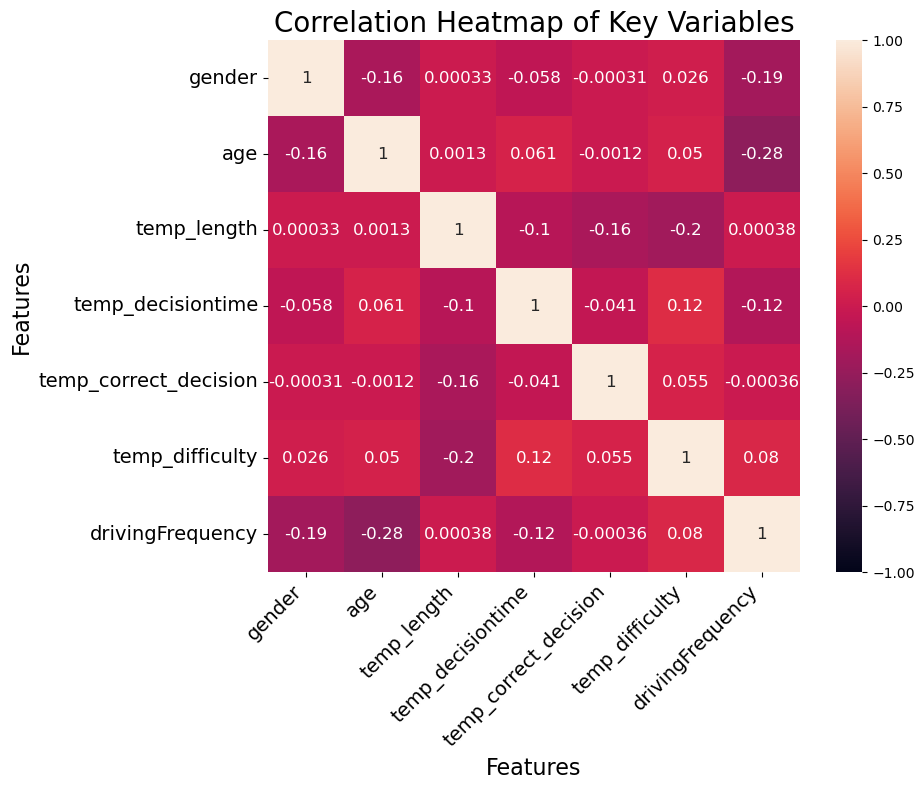

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv('SAdata_allMeasures.csv')


important_vars = ['gender','age','temp_length', 'temp_decisiontime', 
                  'temp_correct_decision', 'temp_difficulty', 'drivingFrequency']


correlation_matrix = data[important_vars].corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, 
             annot_kws={"size": 12}, square=True)

# Add labels and title
plt.title('Correlation Heatmap of Key Variables', fontsize=20)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.tight_layout() 
plt.show()


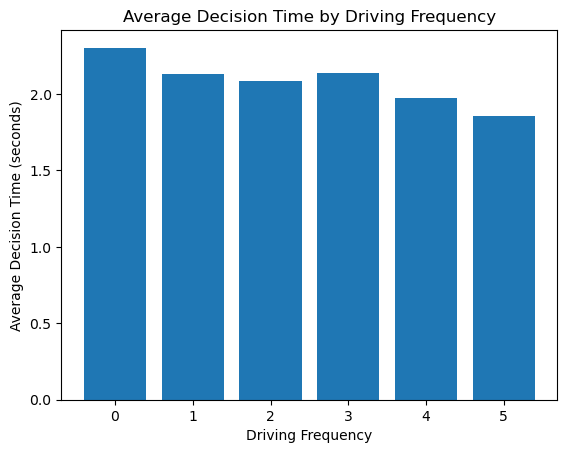

In [6]:
avg_decision_time = data.groupby('drivingFrequency')['temp_decisiontime'].mean().reset_index()

plt.bar(avg_decision_time['drivingFrequency'], avg_decision_time['temp_decisiontime'])
plt.title('Average Decision Time by Driving Frequency')
plt.xlabel('Driving Frequency')
plt.ylabel('Average Decision Time (seconds)')
plt.show()


<Figure size 1200x600 with 0 Axes>

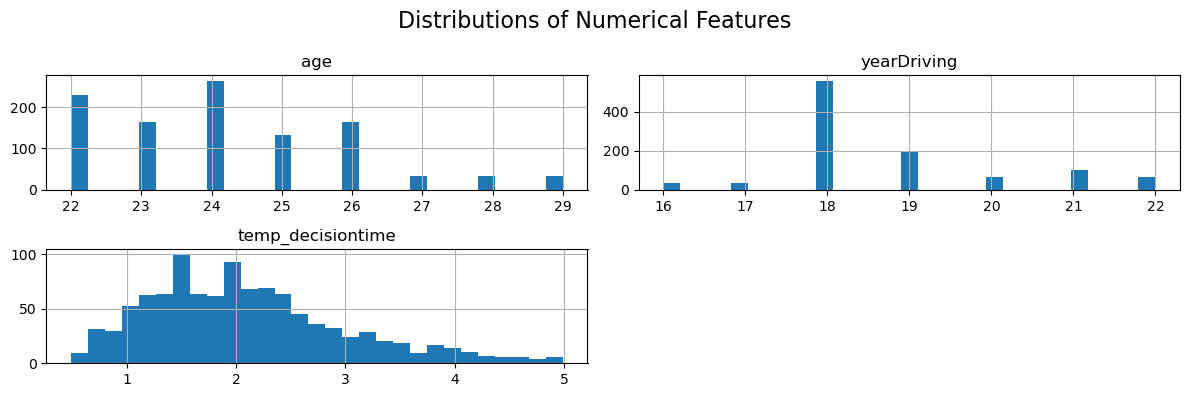

In [7]:
plt.figure(figsize=(12, 6))
data.hist(column=['age', 'yearDriving', 'temp_decisiontime'], bins=29, figsize=(12, 4))
plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

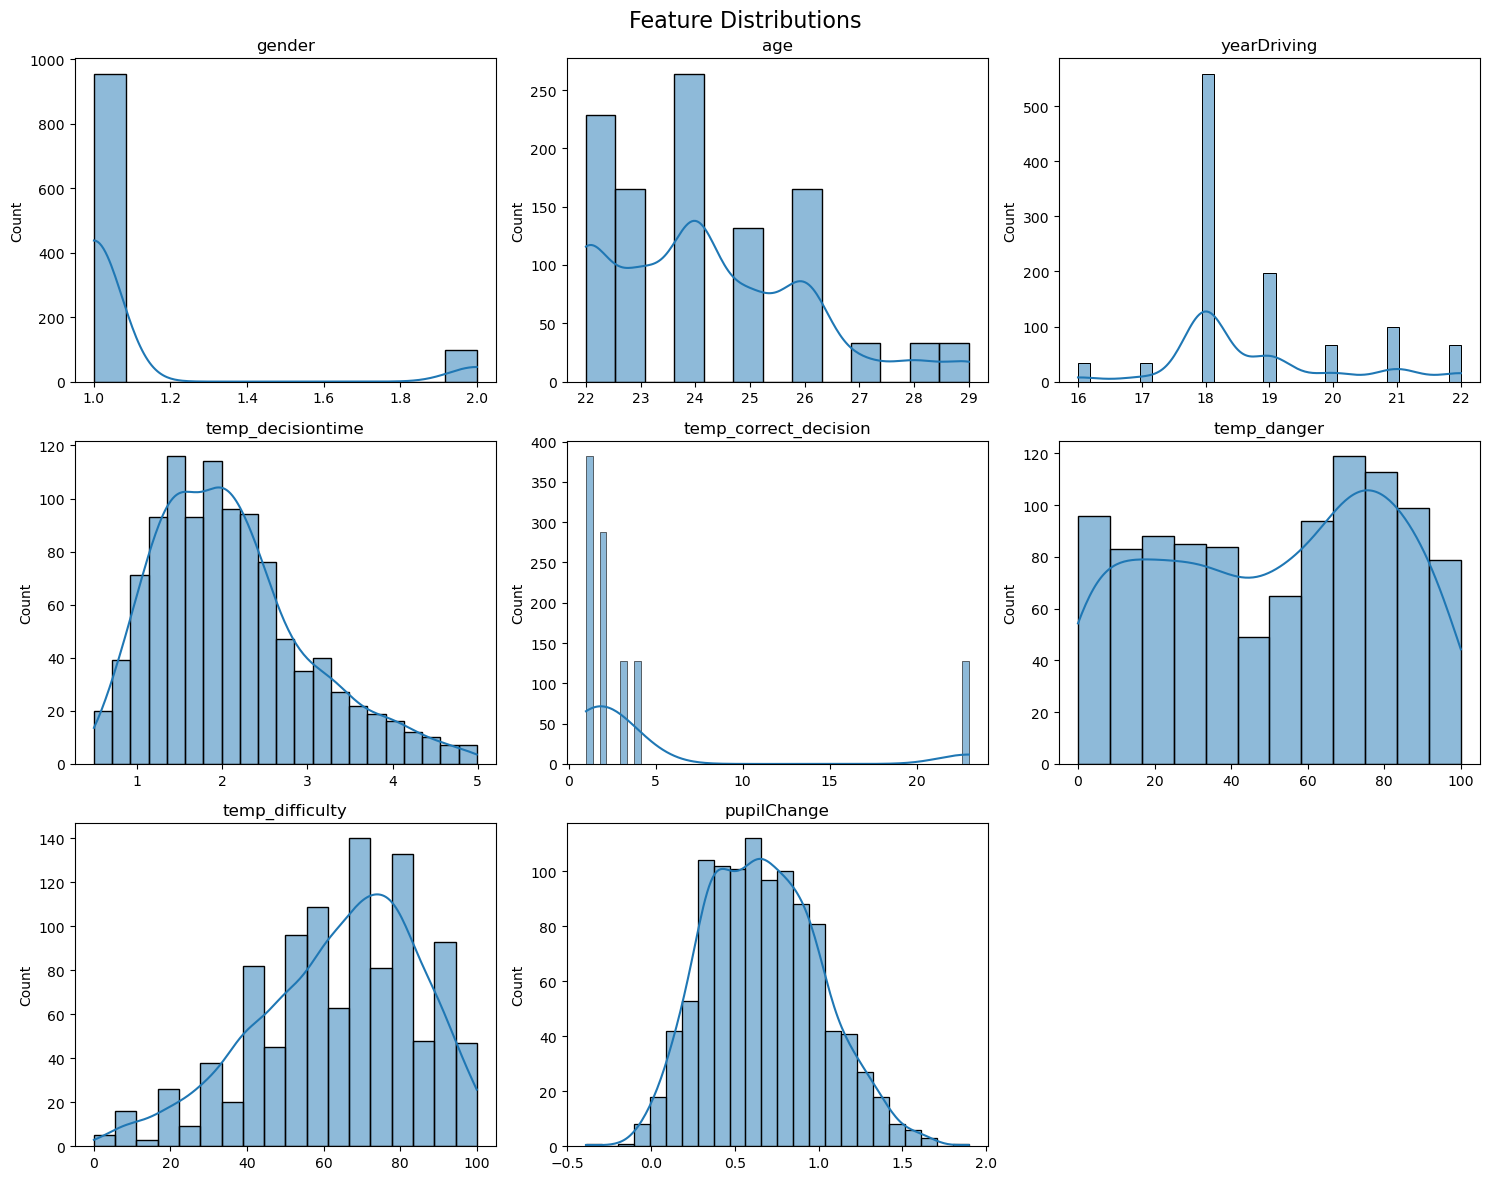

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['gender','age', 'yearDriving', 'temp_decisiontime','temp_correct_decision','temp_danger','temp_difficulty', 'pupilChange']

n_features = len(selected_features)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Feature Distributions', fontsize=16)
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

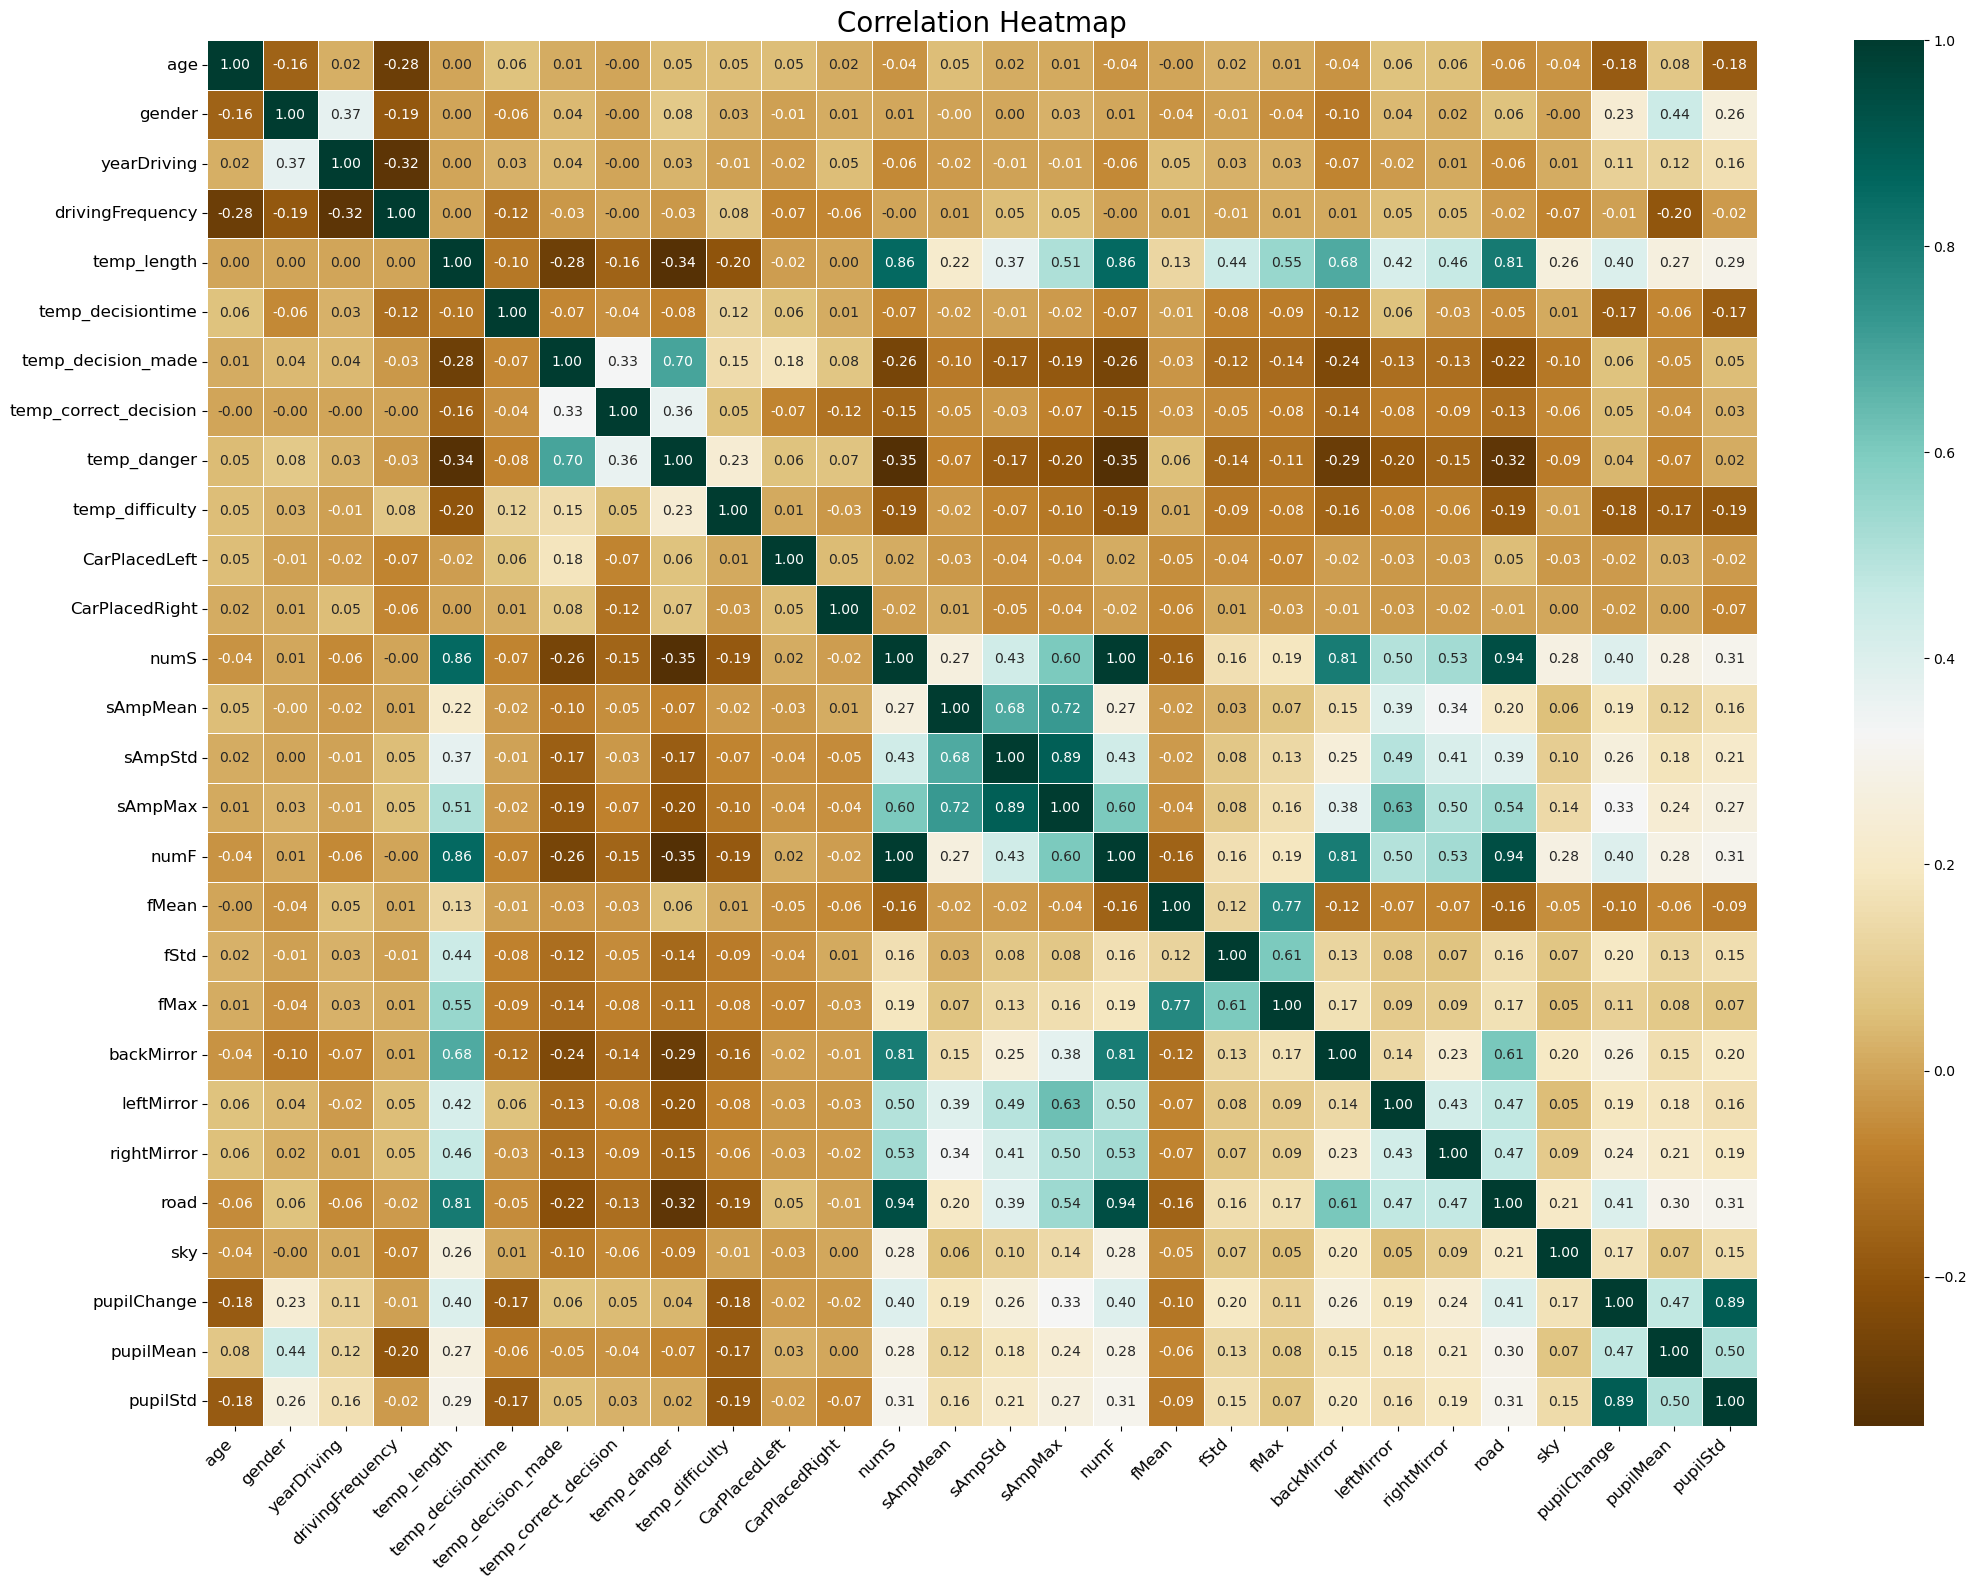

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

X = data.drop(columns=['Y']) 
y = data['Y'] 
plt.figure(figsize=(25, 18))  
correlation_matrix = X.corr()


sns.heatmap(
    correlation_matrix, 
    cmap="BrBG", 
    annot=True,      
    fmt=".2f",       
    annot_kws={"size": 10}, 
    linewidths=0.5    
)

plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

plt.title("Correlation Heatmap", fontsize=20)


plt.show()


In [2]:
X = data.drop(columns=['Y']) 
y = data['Y'] 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# split off the test set (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# split the remaining data into training (70%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.22222, random_state=42)





In [6]:
#Print values
print("\nDataset Sizes:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Val set: {X_val.shape[0]} samples")


Dataset Sizes:
Training set: 737 samples
Testing set: 106 samples
Val set: 211 samples


### Xgboost Regression model
Utilizing the Xgboost library, and also got inspiration for the code from this kaggle notebook, which aided my tuning: 
https://www.kaggle.com/code/paulrohan2020/tutorial-lightgbm-xgboost-catboost-top-11

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=200, reg_alpha=0.1, reg_lambda=5, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.1, gamma=0.1, learning_rate

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


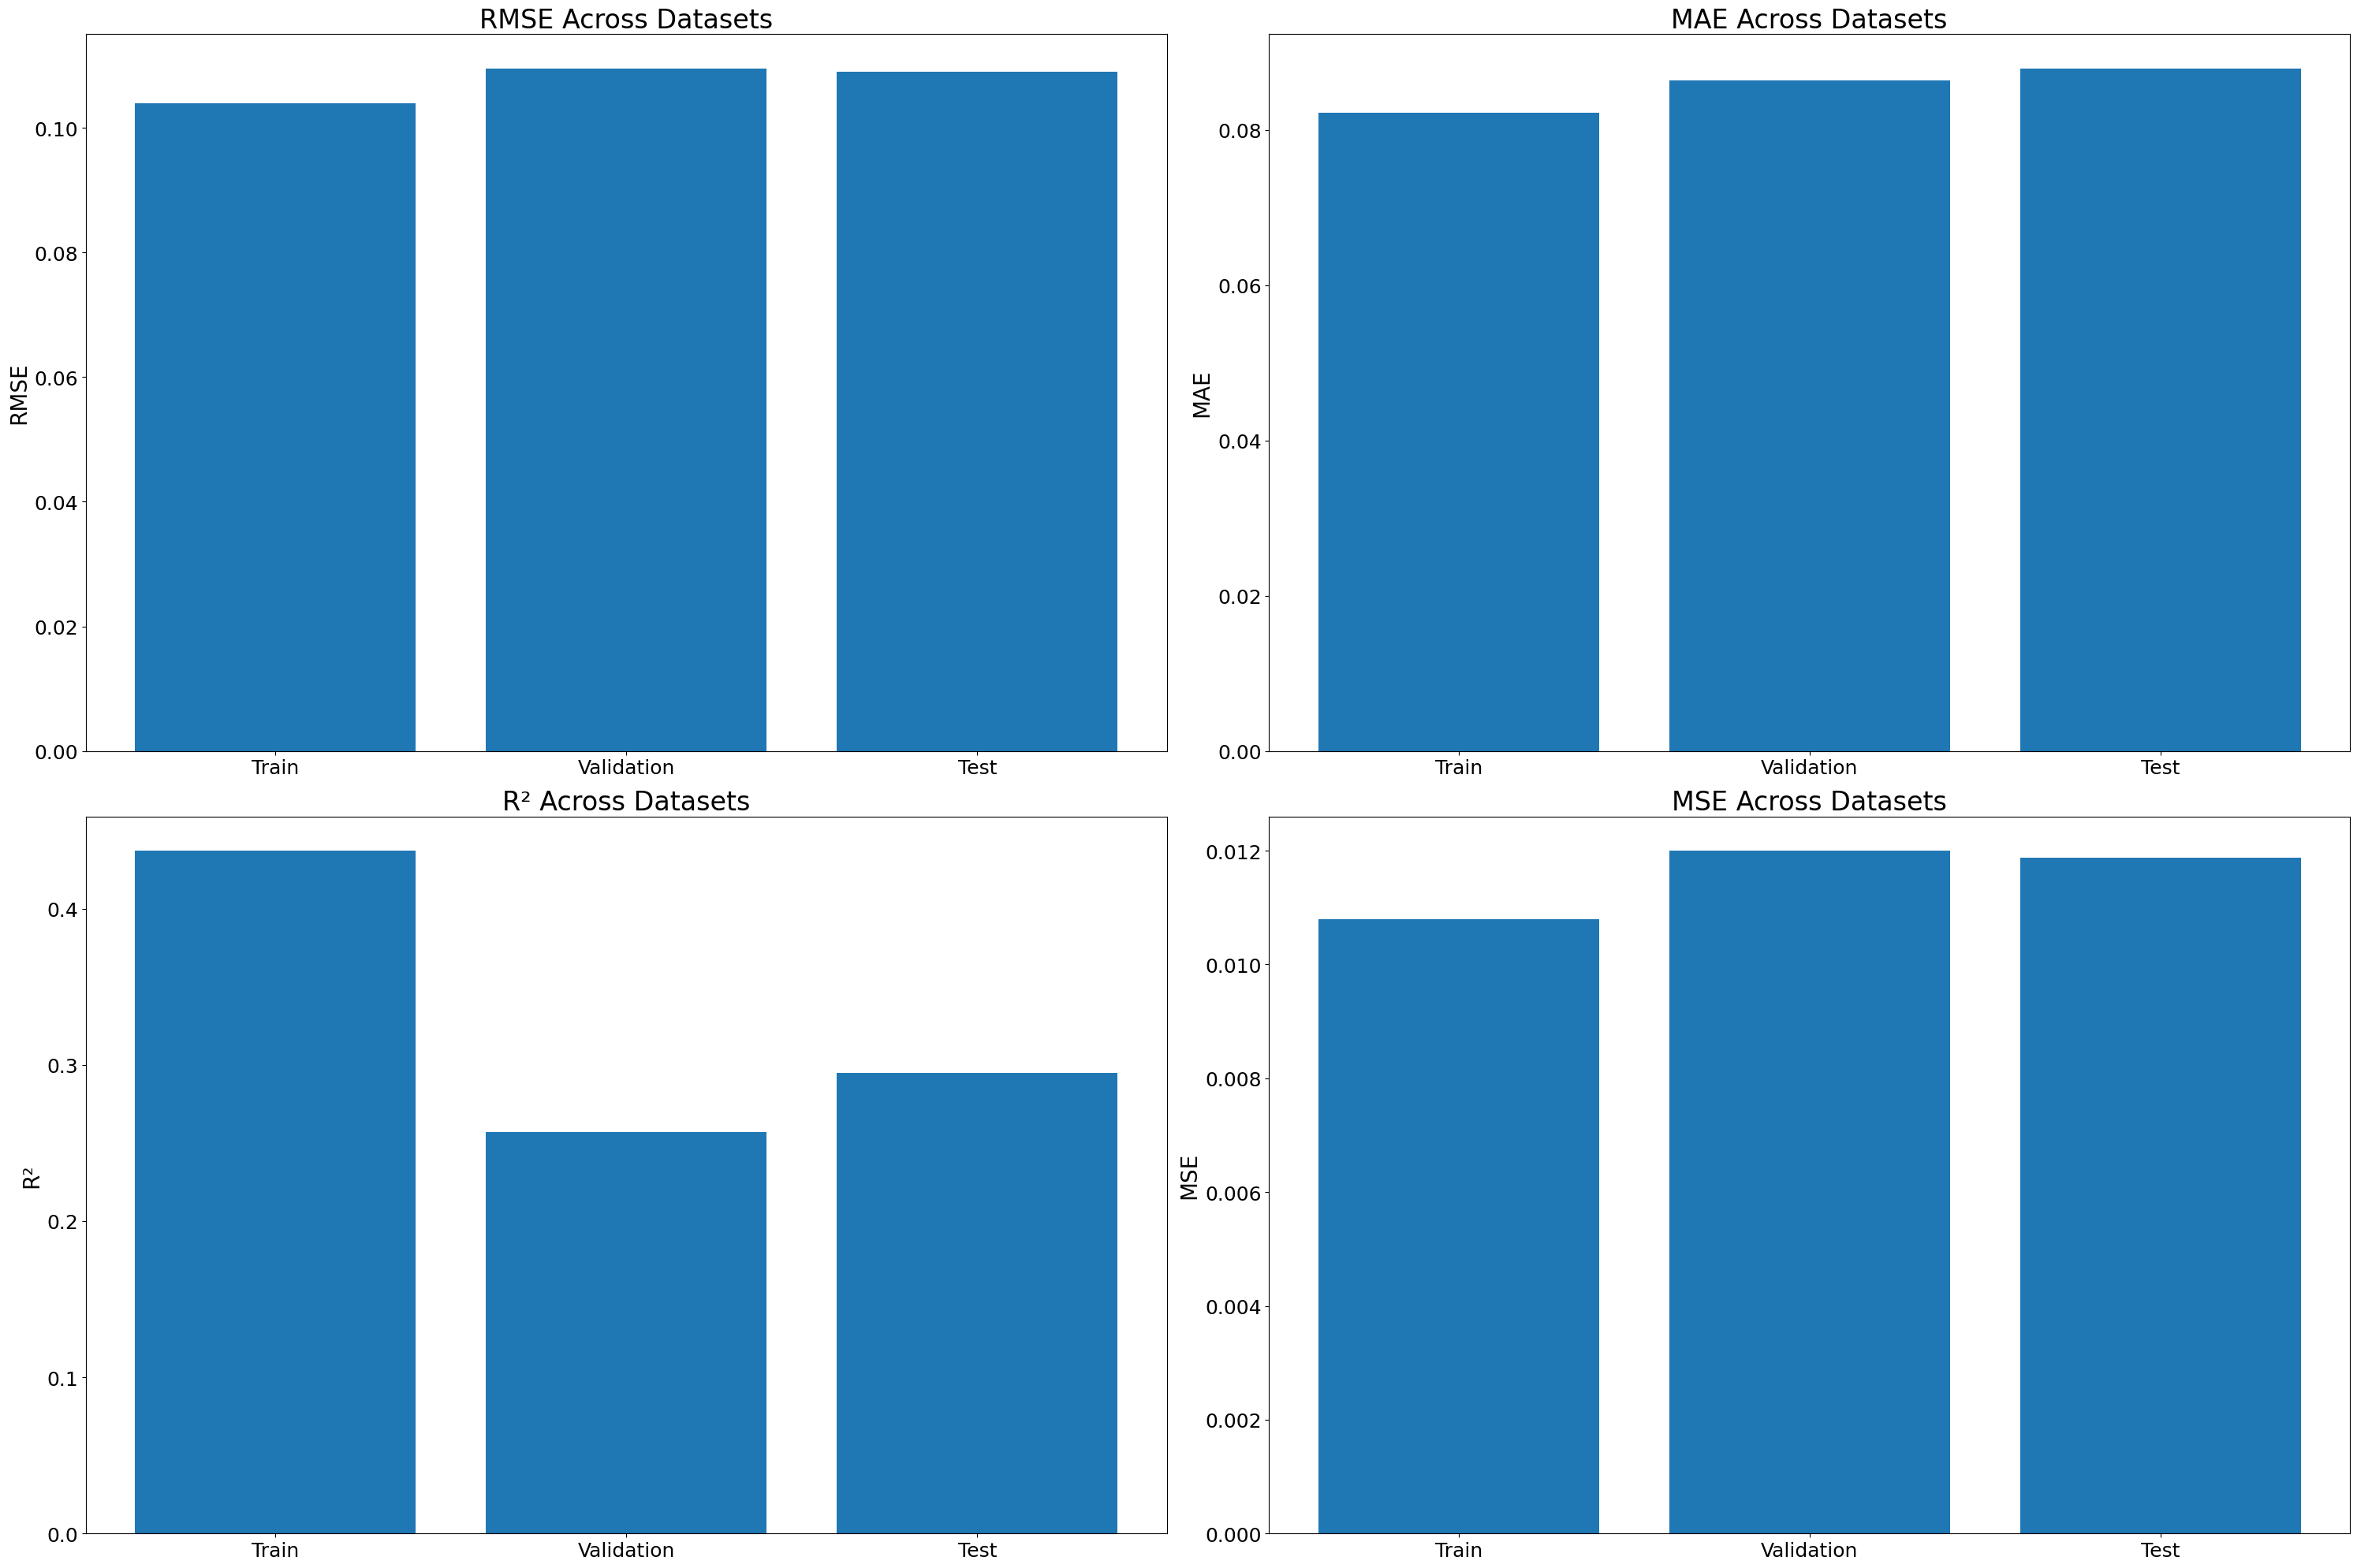

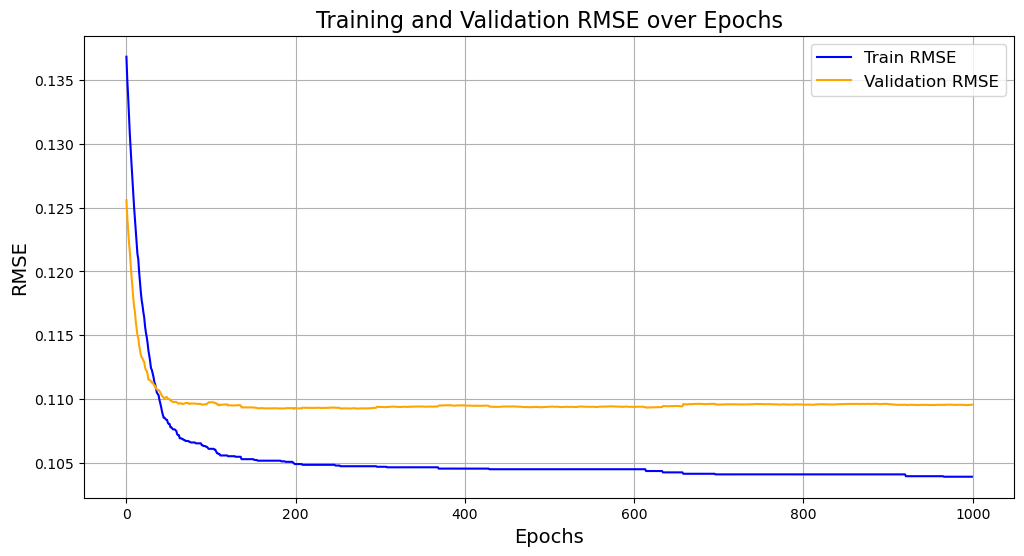

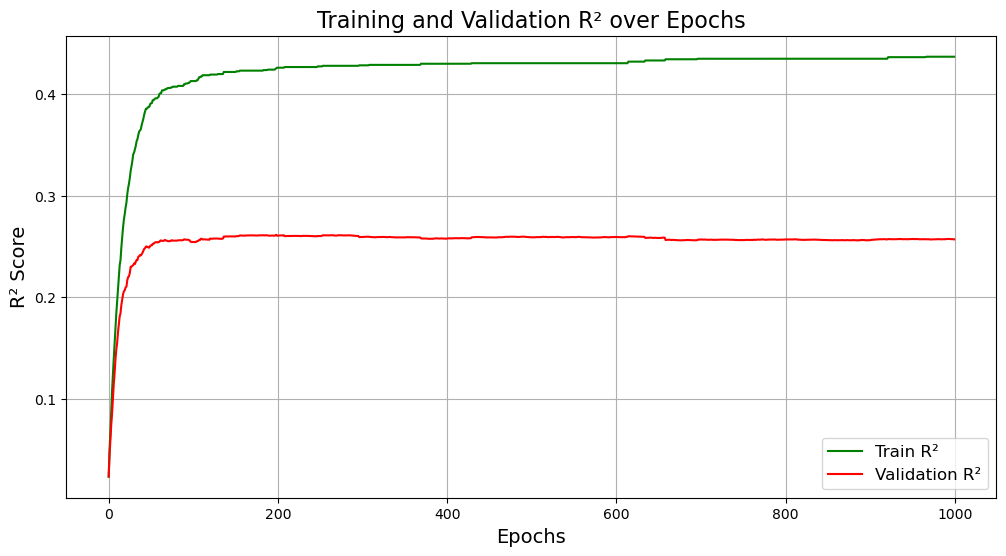


Best Hyperparameters:
{'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0, 'n_estimators': 1000, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.5}

Overall Training Time: 297.66 seconds
Prediction Time: 0.04 seconds

Metrics for Train, Validation, and Test:
Train Metrics: {'MSE': 0.010792654780908876, 'RMSE': 0.10388770274151256, 'MAE': 0.08220126432794135, 'R²': 0.43702923591271525}
Validation Metrics: {'MSE': 0.011998801373666289, 'RMSE': 0.10953904040873413, 'MAE': 0.08640514041280811, 'R²': 0.25704788394806577}
Test Metrics: {'MSE': 0.011882778937856995, 'RMSE': 0.10900815995996353, 'MAE': 0.0879310919264782, 'R²': 0.2948383266687382}


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
import xgboost as xgb
import time

def xgboost_training(X_train, X_val, X_test, y_train, y_val, y_test):
    np.random.seed(42)
    
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.001],
        'max_depth': [2, 3, 4],
        'n_estimators': [200, 500,1000],
        'subsample': [0.6, 0.7, 0.8,0.1,0.2],
        'colsample_bytree': [ 0.5,0.1,0.7,0.5],
        'min_child_weight': [2, 3, 5, 7],
        'gamma': [1,10,5,0.1],
        'reg_alpha': [ 0,0.1],
        'reg_lambda': [ 1, 5]
    }

    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    xg_reg = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )

    random_search = RandomizedSearchCV(
        estimator=xg_reg,
        param_distributions=param_grid,
        n_iter=200, 
        cv=kfold,
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    start_training_time = time.time()

    # Fitting RandomizedSearchCV
    random_search.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],  # Validation set
        verbose=False
    )

 
    training_time = time.time() - start_training_time

    best_model = random_search.best_estimator_

 
    start_pred_time = time.time()

    # Predictions
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    

    prediction_time = time.time() - start_pred_time
   
    eval_results = random_search.best_estimator_.evals_result()
   
    epochs = len(eval_results['validation_0']['rmse'])  
    x_axis = range(0, epochs)
    # Metrics Calculation
    def calculate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = root_mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}


    train_metrics = calculate_metrics(y_train, y_train_pred)
    val_metrics = calculate_metrics(y_val, y_val_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Visualization: RMSE, MSE, MAE, R²
    plt.figure(figsize=(30, 20))

    # RMSE Plot
    plt.subplot(2, 2, 1)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['RMSE'], val_metrics['RMSE'], test_metrics['RMSE']])
    plt.title('RMSE Across Datasets', fontsize=24)
    plt.ylabel('RMSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # MAE Plot
    plt.subplot(2, 2, 2)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MAE'], val_metrics['MAE'], test_metrics['MAE']])
    plt.title('MAE Across Datasets', fontsize=24)
    plt.ylabel('MAE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # R² Plot
    plt.subplot(2, 2, 3)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['R²'], val_metrics['R²'], test_metrics['R²']])
    plt.title('R² Across Datasets', fontsize=24)
    plt.ylabel('R²', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # MSE Plot
    plt.subplot(2, 2, 4)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MSE'], val_metrics['MSE'], test_metrics['MSE']])
    plt.title('MSE Across Datasets', fontsize=24)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.tight_layout()
    plt.show()

    train_rmse = eval_results['validation_0']['rmse']
    val_rmse = eval_results['validation_1']['rmse']
    
    # Compute R² for each epoch
    train_r2 = [1 - (rmse**2 / np.var(y_train)) for rmse in train_rmse]
    val_r2 = [1 - (rmse**2 / np.var(y_val)) for rmse in val_rmse]

    # Plot RMSE and R² over epochs
    epochs = range(len(train_rmse))

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_rmse, label='Train RMSE', color='blue')
    plt.plot(epochs, val_rmse, label='Validation RMSE', color='orange')
    plt.title('Training and Validation RMSE over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_r2, label='Train R²', color='green')
    plt.plot(epochs, val_r2, label='Validation R²', color='red')
    plt.title('Training and Validation R² over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('R² Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()


    print("\nBest Hyperparameters:")
    print(random_search.best_params_)
    
    print(f"\nOverall Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")

 
    print("\nMetrics for Train, Validation, and Test:")
    print(f"Train Metrics: {train_metrics}")
    print(f"Validation Metrics: {val_metrics}")
    print(f"Test Metrics: {test_metrics}")

    return best_model

# Usage
best_model = xgboost_training(X_train, X_val, X_test, y_train, y_val, y_test)


### LightGBM 
LightGBM library was used and this paper for the fine-tuning
https://arxiv.org/abs/2103.14792 

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 54 is smaller than n_iter=200. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 54 candidates, totalling 540 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightG

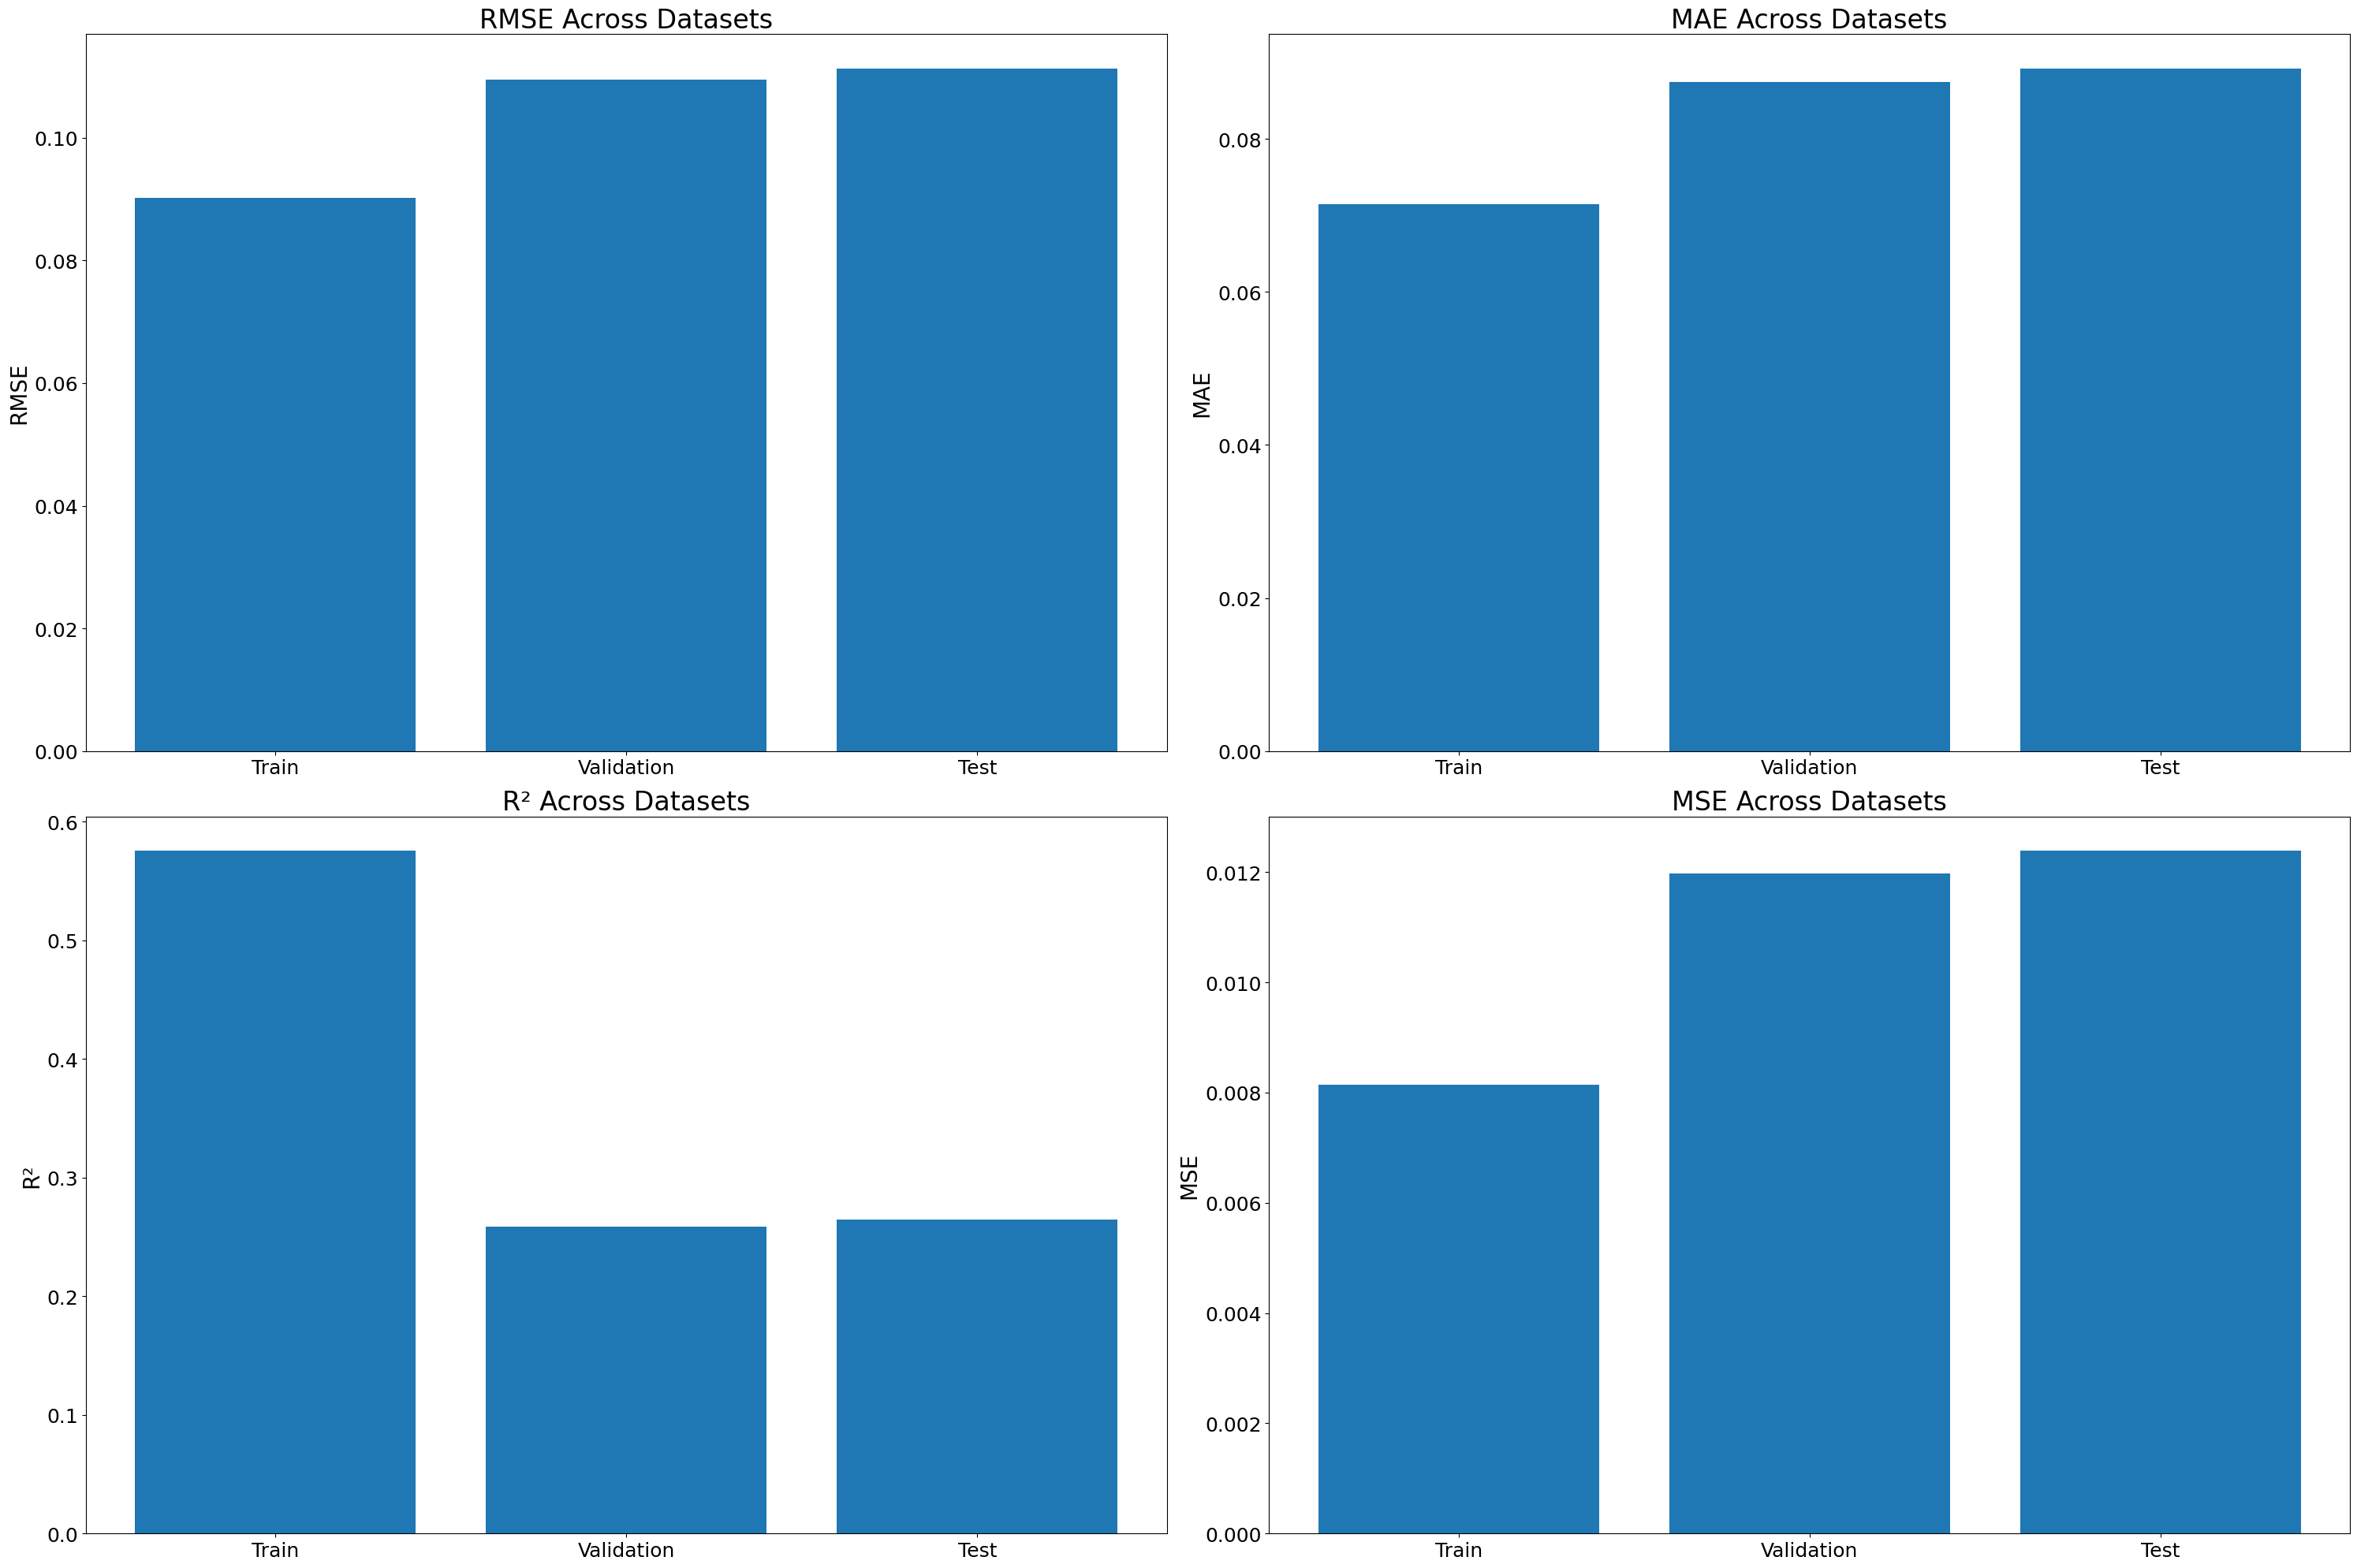

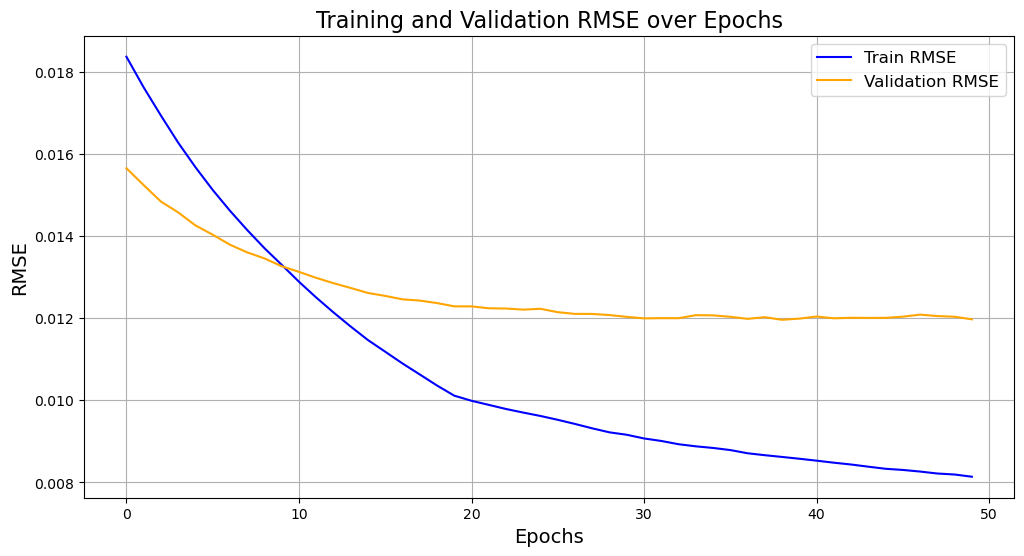

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.

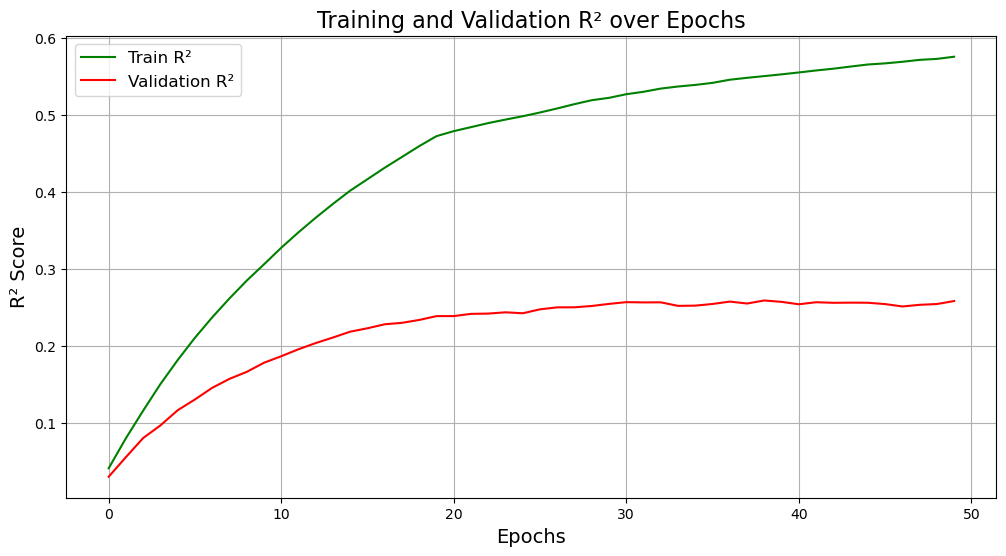


Best Hyperparameters:
{'num_leaves': 31, 'n_estimators': 50, 'learning_rate': 0.05, 'boosting_type': 'goss'}

Overall Training Time: 468.09 seconds
Prediction Time: 0.01 seconds

Metrics for Train, Validation, and Test:
Train Metrics: {'MSE': 0.00813905023337507, 'RMSE': 0.09021668489461952, 'MAE': 0.0714122053002618, 'R²': 0.5754476148970189}
Validation Metrics: {'MSE': 0.0119736360504193, 'RMSE': 0.10942411091902597, 'MAE': 0.08745396761823511, 'R²': 0.2586060921036333}
Test Metrics: {'MSE': 0.012389082078414335, 'RMSE': 0.11130625354585579, 'MAE': 0.08920758871175075, 'R²': 0.2647926974707693}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb
import time

def lightgbm_training(X_train, X_val, X_test, y_train, y_val, y_test):
    np.random.seed(42)
    
    param_grid = {
    'boosting_type': ['goss'], 
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 75,100, 200, 300],
    'learning_rate': [0.05, 0.01, 0.001],
   
}


    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    lgb_reg = lgb.LGBMRegressor(
        objective='regression',
        metrics= ['l2', 'l1'],
        random_state=42,
        n_jobs=-1
    )

    random_search = RandomizedSearchCV(
        estimator=lgb_reg,
        param_distributions=param_grid,
        n_iter=200, 
        cv=kfold,
        scoring='neg_mean_squared_error',
        verbose=2,
        n_jobs=-1,
        random_state=42
    )

    start_training_time = time.time()

    random_search.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)] 
    )


    training_time = time.time() - start_training_time

    best_model = random_search.best_estimator_

   
    start_pred_time = time.time()

    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    
    prediction_time = time.time() - start_pred_time
    # Extract evaluation results
    eval_results = random_search.best_estimator_.evals_result_
    
    # Extract metrics for training and validation sets
    epochs = len(eval_results['training']['l2'])  # LightGBM uses 'l2' for RMSE
    x_axis = range(0, epochs)
    
    # Metrics Calculation
    def calculate_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}
    
    train_metrics = calculate_metrics(y_train, y_train_pred)
    val_metrics = calculate_metrics(y_val, y_val_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)

    # Visualization: RMSE, MSE, MAE, R²
    plt.figure(figsize=(30, 20))

    # RMSE Plot
    plt.subplot(2, 2, 1)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['RMSE'], val_metrics['RMSE'], test_metrics['RMSE']])
    plt.title('RMSE Across Datasets', fontsize=24)
    plt.ylabel('RMSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # MAE Plot
    plt.subplot(2, 2, 2)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MAE'], val_metrics['MAE'], test_metrics['MAE']])
    plt.title('MAE Across Datasets', fontsize=24)
    plt.ylabel('MAE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # R² Plot
    plt.subplot(2, 2, 3)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['R²'], val_metrics['R²'], test_metrics['R²']])
    plt.title('R² Across Datasets', fontsize=24)
    plt.ylabel('R²', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # MSE Plot
    plt.subplot(2, 2, 4)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MSE'], val_metrics['MSE'], test_metrics['MSE']])
    plt.title('MSE Across Datasets', fontsize=24)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.tight_layout()
    plt.show()

    train_rmse = eval_results['training']['l2']
    val_rmse = eval_results['valid_1']['l2']
    

# Plot RMSE over epochs
    epochs = range(len(train_rmse))
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_rmse, label='Train RMSE', color='blue')
    plt.plot(epochs, val_rmse, label='Validation RMSE', color='orange')
    plt.title('Training and Validation RMSE over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

    # Calculate R² dynamically for each epoch
    train_r2 = []
    val_r2 = []

# Iterate over epochs
    for epoch in range(1, len(eval_results['training']['l2']) + 1):  
      train_pred = best_model.predict(X_train, num_iteration=epoch)
      val_pred = best_model.predict(X_val, num_iteration=epoch)
      train_r2.append(r2_score(y_train, train_pred))
      val_r2.append(r2_score(y_val, val_pred))

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, train_r2, label='Train R²', color='green')
    plt.plot(epochs, val_r2, label='Validation R²', color='red')
    plt.title('Training and Validation R² over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('R² Score', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.show()

    # Print Results
    print("\nBest Hyperparameters:")
    print(random_search.best_params_)
    
    # Print Timing Information
    print(f"\nOverall Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")

    # Print Metrics
    print("\nMetrics for Train, Validation, and Test:")
    print(f"Train Metrics: {train_metrics}")
    print(f"Validation Metrics: {val_metrics}")
    print(f"Test Metrics: {test_metrics}")

    return best_model


best_model = lightgbm_training(X_train, X_val, X_test, y_train, y_val, y_test)


#### Distributed LightGBM
Dask documentation + trial and error, due to Hardware limitations and PC problems.
https://www.dask.org/ 

In [2]:
import pandas as pd



data = pd.read_csv('SAdata_allMeasures.csv') 
X = data.drop(columns=['Y']) 
y = data['Y'] 

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50403 instead
  warnings.warn(


Training fold 1
Finding random open ports for workers


/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Trying to bind port 50519...
[LightGBM] [Info] Binding port 50519 succeeded
[LightGBM] [Info] Listening...
[LightGBM] [Info] Trying to bind port 50528...
[LightGBM] [Info] Binding port 50528 succeeded
[LightGBM] [Info] Listening...
[LightGBM] [Info] Trying to bind port 50529...
[LightGBM] [Info] Binding port 50529 succeeded
[LightGBM] [Info] Listening...
[LightGBM] [Warning] Connecting to rank 3 failed, waiting for 200 milliseconds
[LightGBM] [Info] Trying to bind port 50518...
[LightGBM] [Info] Binding port 50518 succeeded
[LightGBM] [Info] Listening...
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 0, total number of machines: 4
[LightGBM] [Info] Local rank: 1, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility r

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] [LightGBM] [Warning] No further splits with positive gain, best gain: -inf
No f

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=tru

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 0, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 1, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 2, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Local rank: 3, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 0, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Local rank: 3, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 1, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 2, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 0, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 1, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 2, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Local rank: 3, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 2, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Local rank: 3, total number of machines: 4
[LightGBM] [Warning] [LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] 

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 0, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 1, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to ran

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 0, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 2
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 1, total number of machines: 4
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Connected to rank 0
[LightGBM] [Info] Connected to rank 1
[LightGBM] [Info] Connected to rank 3
[LightGBM] [Info] Local rank: 2, total number of machines: 4
[LightGBM] [Info] Connected to rank 0
[LightGBM] 

/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")
/opt/anaconda3/envs/AIMA/lib/python3.10/site-packages/lightgbm/dask.py:549: UserWarning: Parameter num_threads will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 27
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 27
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, 

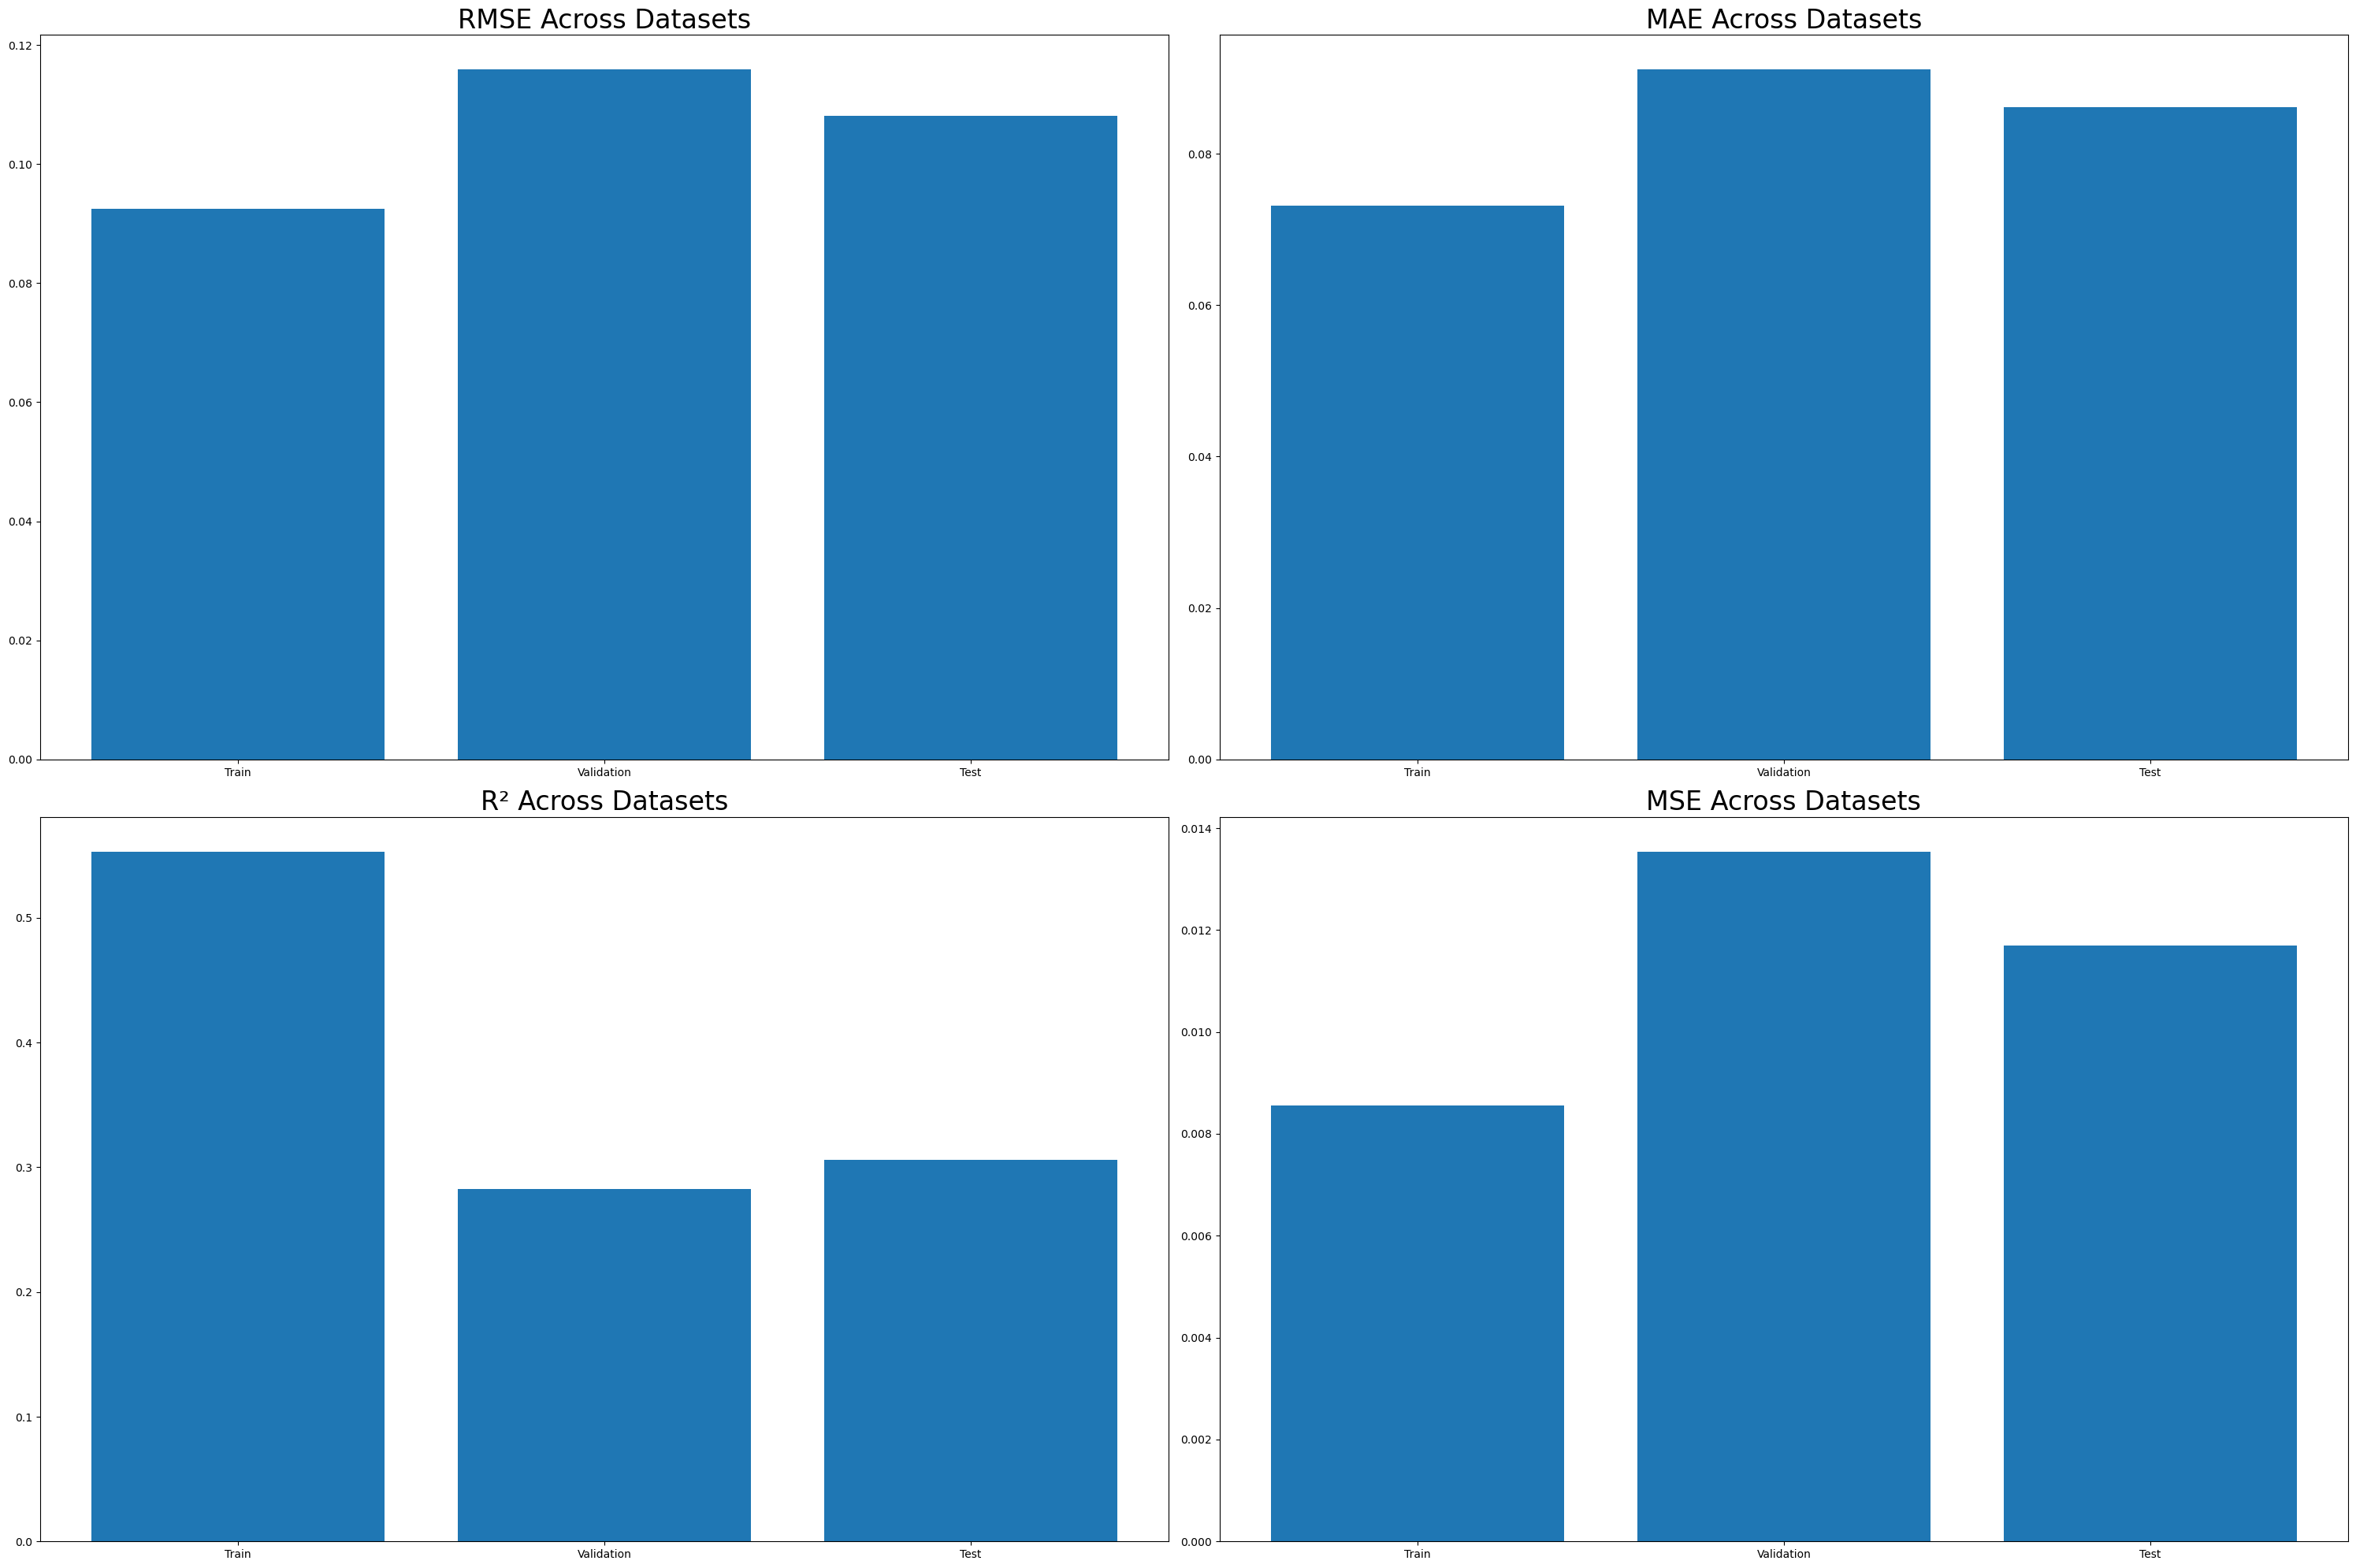

In [8]:
from dask.distributed import Client, LocalCluster
import dask.dataframe as dd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error
from lightgbm.dask import DaskLGBMRegressor
from sklearn.model_selection import train_test_split, KFold
import time
import numpy as np
import matplotlib.pyplot as plt

# Initializing dask client and cluster
cluster = LocalCluster(n_workers=4, threads_per_worker=2)
client = Client(cluster)


# 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# split off the test set (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# split the remaining data into training (70%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.22222, random_state=42)


# Convert pandas to to Dask DataFrames
X_train_dask = dd.from_pandas(X_train.reset_index(drop=True), npartitions=100)
y_train_dask = dd.from_pandas(y_train.reset_index(drop=True), npartitions=100)
X_val_dask = dd.from_pandas(X_val.reset_index(drop=True), npartitions=100)
y_val_dask = dd.from_pandas(y_val.reset_index(drop=True), npartitions=100)
X_test_dask = dd.from_pandas(X_test.reset_index(drop=True), npartitions=100)
y_test_dask = dd.from_pandas(y_test.reset_index(drop=True), npartitions=100)

def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R²': r2}

def distributed_lightgbm_training(X_train_dask, y_train_dask):
    params = {
        'boosting_type': 'goss',
        'n_estimators': 50,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'objective': 'regression',
        'metric': 'rmse',
        'tree_learner': "data_parallel",
        'random_state': 42,
    }

    lgb_reg = DaskLGBMRegressor(**params)

    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    train_metrics_list = []
    val_metrics_list = []
    training_times = []
    prediction_times = []
    
    eval_results_list = []  # store evaluation results for each fold
    
    # Convert Dask DataFrames to Pandas for KFold splitting
    X_train_pd = X_train_dask.compute()
    y_train_pd = y_train_dask.compute()
    
    for fold, (train_index, val_index) in enumerate(kf.split(X_train_pd)):
        print(f"Training fold {fold + 1}")
        
        # Use iloc to select rows based on indices
        X_train_fold = X_train_pd.iloc[train_index]
        y_train_fold = y_train_pd.iloc[train_index]
        X_val_fold = X_train_pd.iloc[val_index]
        y_val_fold = y_train_pd.iloc[val_index]

        # Convert back to Dask DataFrames for training
        X_train_fold_dask = dd.from_pandas(X_train_fold.reset_index(drop=True), npartitions=4)
        y_train_fold_dask = dd.from_pandas(y_train_fold.reset_index(drop=True), npartitions=4)
        X_val_fold_dask = dd.from_pandas(X_val_fold.reset_index(drop=True), npartitions=4)
        y_val_fold_dask = dd.from_pandas(y_val_fold.reset_index(drop=True), npartitions=4)

        start_training_time = time.time()
        
        # Fit the model and store eval results
        lgb_reg.fit(X_train_fold_dask,
                     y_train_fold_dask,
                     eval_set=[(X_val_fold_dask, y_val_fold_dask)],
                     eval_metric='rmse')
        
        training_time = time.time() - start_training_time
        training_times.append(training_time)

        start_pred_time = time.time()
        
        # Predictions for metrics calculation
        y_train_pred = lgb_reg.predict(X_train_fold_dask).compute()
        y_val_pred = lgb_reg.predict(X_val_fold_dask).compute()
        
        prediction_time = time.time() - start_pred_time
        prediction_times.append(prediction_time)

        train_metrics = calculate_metrics(y_train_fold_dask, y_train_pred)
        val_metrics = calculate_metrics(y_val_fold_dask, y_val_pred)

        train_metrics_list.append(train_metrics)
        val_metrics_list.append(val_metrics)

        eval_results_list.append(lgb_reg.evals_result_)

    avg_train_metrics = {metric: np.mean([m[metric] for m in train_metrics_list]) for metric in train_metrics_list[0]}
    avg_val_metrics = {metric: np.mean([m[metric] for m in val_metrics_list]) for metric in val_metrics_list[0]}

    print("\nAverage Train Metrics:", avg_train_metrics)
    print("Average Validation Metrics:", avg_val_metrics)
    print(f"\nAverage Training Time per Fold: {np.mean(training_times):.2f} seconds")
    print(f"Average Prediction Time per Fold: {np.mean(prediction_times):.2f} seconds")

    return lgb_reg, avg_train_metrics, avg_val_metrics, eval_results_list


best_model_kfold, avg_train_metrics, avg_val_metrics, eval_results_list = distributed_lightgbm_training(X_train_dask, y_train_dask)

# Make predictions on the test set
y_test_pred = best_model_kfold.predict(X_test_dask).compute()

# Calculate metrics for the test set
test_metrics = calculate_metrics(y_test_dask, y_test_pred)

# Print Test Metrics
print("\nTest Metrics:", test_metrics)

# Visualization of Metrics Across Datasets
def plot_metrics(train_metrics, val_metrics, test_metrics):
    plt.figure(figsize=(30, 20))

    # RMSE Plot
    plt.subplot(2, 2, 1)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['RMSE'], val_metrics['RMSE'], test_metrics['RMSE']])
    plt.title('RMSE Across Datasets', fontsize=24)

    # MAE Plot
    plt.subplot(2, 2, 2)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MAE'], val_metrics['MAE'], test_metrics['MAE']])
    plt.title('MAE Across Datasets', fontsize=24)

    # R² Plot
    plt.subplot(2, 2, 3)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['R²'], val_metrics['R²'], test_metrics['R²']])
    plt.title('R² Across Datasets', fontsize=24)

    # MSE Plot
    plt.subplot(2, 2, 4)
    plt.bar(['Train', 'Validation', 'Test'], 
            [train_metrics['MSE'], val_metrics['MSE'], test_metrics['MSE']])
    plt.title('MSE Across Datasets', fontsize=24)

    plt.tight_layout()
    plt.show()

plot_metrics(avg_train_metrics, avg_val_metrics, test_metrics)


client.close()


